## Section 1.1 - Funnel Analysis EDA

In [148]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
funnel=pd.read_excel('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/AssignmentData.xlsx',sheet_name='WorkerFunnel')
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [149]:
## Statistical Analysis

In [150]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [151]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB


In [152]:
##Handle missing vales 

In [153]:
funnel['Actual Productivity'].fillna(0, inplace=True)

In [154]:
##Change to appropriate datatype

In [155]:
funnel['Date'] = pd.to_datetime(funnel['Date'],errors='coerce')
funnel['Date']=funnel['Date'].dt.date
funnel['Targeted Productivity']=pd.to_numeric(funnel['Targeted Productivity'],errors='coerce')
funnel['Overtime']=pd.to_numeric(funnel['Overtime'],errors='coerce')
funnel['No. of Workers']=pd.to_numeric(funnel['No. of Workers'],errors='coerce')
funnel['Actual Productivity']=pd.to_numeric(funnel['Actual Productivity'],errors='coerce')

In [156]:
funnel.describe()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.729574,4562.474916,34.632943,0.717063
std,0.097911,3345.777708,22.192593,0.206260
min,0.070000,0.000000,2.000000,0.000000
25%,0.700000,1440.000000,9.000000,0.637296
50%,0.750000,3960.000000,34.000000,0.755521
75%,0.800000,6937.500000,57.000000,0.850137
max,0.800000,25920.000000,89.000000,1.120437


In [157]:
funnel.isnull().sum() #Finding any null

Date                     0
Quarter                  0
Department               0
Targeted Productivity    1
Overtime                 1
No. of Workers           1
Actual Productivity      1
dtype: int64

In [158]:
#Replacing Null with Mean
funnel['Targeted Productivity'].fillna(funnel['Targeted Productivity'].mean(), inplace=True)
funnel['Overtime'].fillna(funnel['Overtime'].mean(), inplace=True)
funnel['No. of Workers'].fillna(funnel['No. of Workers'].mean(), inplace=True)
funnel['Actual Productivity'].fillna(funnel['Actual Productivity'].mean(), inplace=True)

In [159]:
#Find and drop Duplicates
funnel.duplicated().sum()
funnel=funnel.drop_duplicates()

In [160]:
#Splitting numeric and object columns
numcols=funnel.select_dtypes(include=['int','float']).columns.to_list()
catcols=funnel.select_dtypes('object').columns.to_list()
exclude_cols = ['Date']
filtered_catcols = [col for col in catcols if col not in exclude_cols]

In [161]:
numcols

['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

In [162]:
catcols

['Date', 'Quarter', 'Department']

In [163]:
## UNIVARIATE ANALYSIS

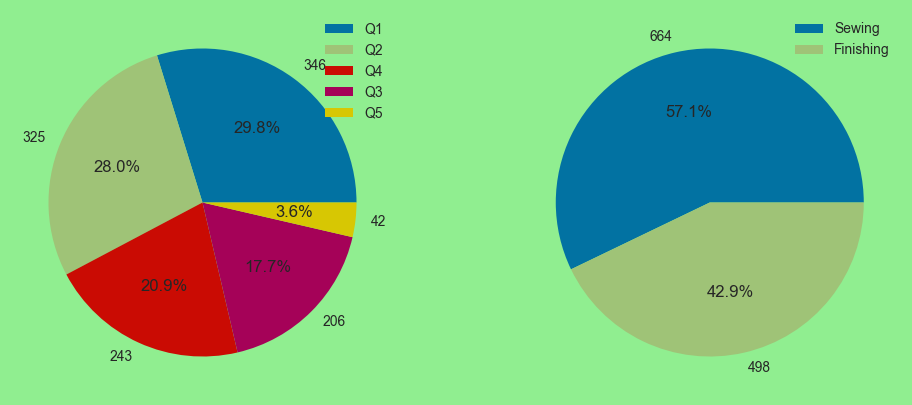

In [164]:
#Distribution of Categorical Columns
fig,ax=plt.subplots(1,2,figsize=(12,5),facecolor='lightgreen')
ax=ax.flatten()
for i,col in enumerate(filtered_catcols):
    ax[i].pie(x=funnel[col].value_counts(),data=funnel,labels=funnel[col].value_counts(),autopct='%1.1f%%')
    ax[i].legend(funnel[col].value_counts().index,loc='upper right',fontsize='small')

In [165]:
#OBS:
#Q1 and Q2 are the quarters that make up to 60 percent of total
#Sewing counts more than Finishing

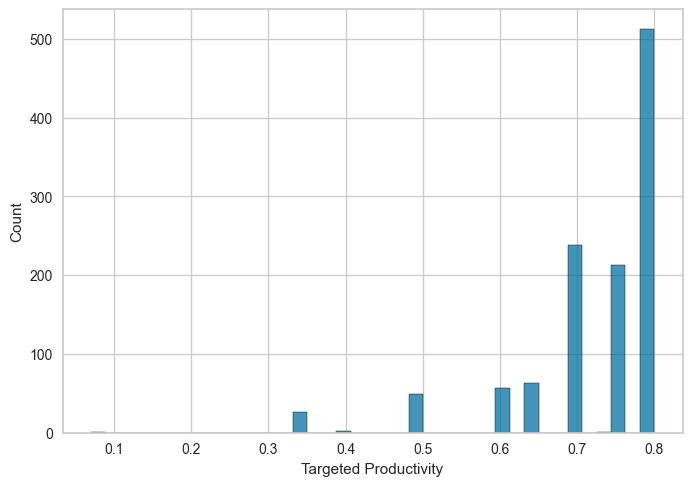

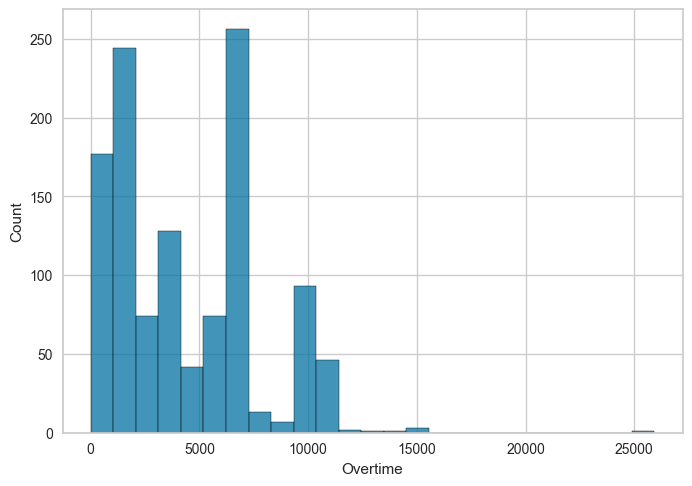

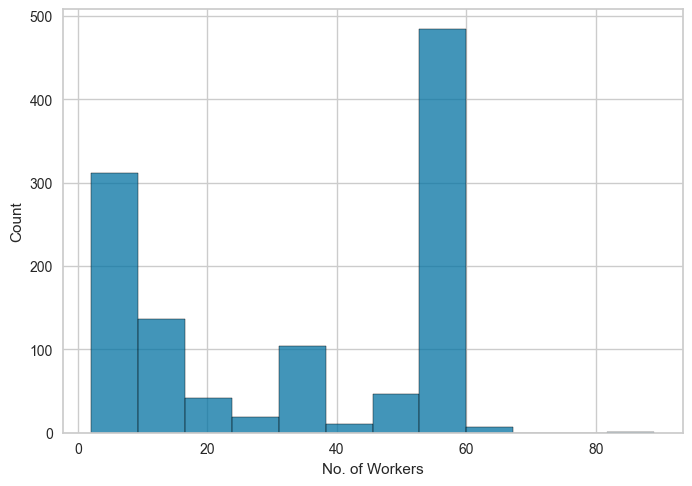

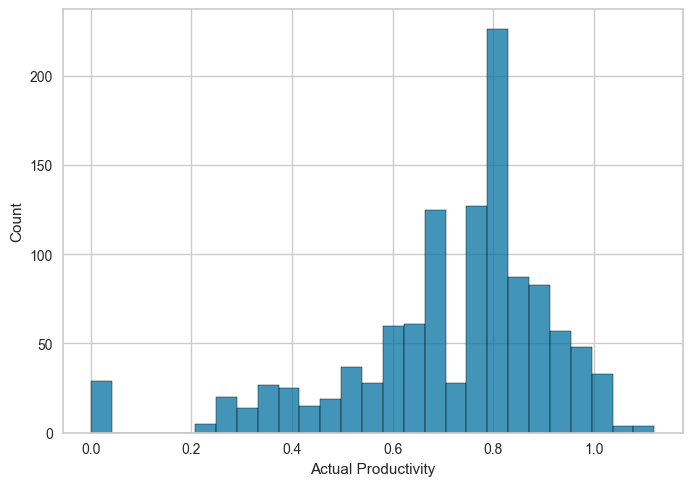

In [166]:
#Distribution of Numerical Columns
for col in numcols:
    sns.histplot(x=col,data=funnel,)
    plt.show()

In [167]:
#OBS:
#Targeted Productivity is set 0.8 mostly or 0.7 and above
#Overtime lies between 0 to 10k minutes with some outliers
#Mostly with 55-60 workers per team but it varies depending on team
#Some workers Exceed the Targeted Productivity,its above 0.8


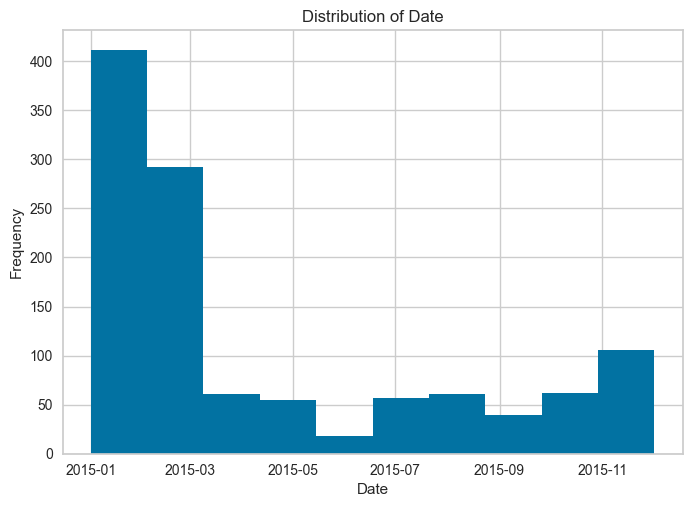

In [168]:
plt.hist(funnel['Date'],bins=10)
plt.title('Distribution of Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [169]:
## BIVARIATE ANALYSIS

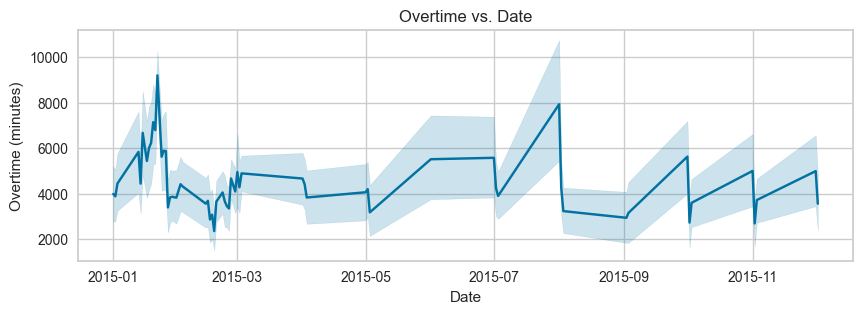

In [170]:
#Overtime varies over Dates
plt.figure(figsize=(10, 3))
sns.lineplot(x='Date', y='Overtime', data=funnel)
plt.title('Overtime vs. Date')
plt.xlabel('Date')
plt.ylabel('Overtime (minutes)')
plt.grid(True)
plt.show()

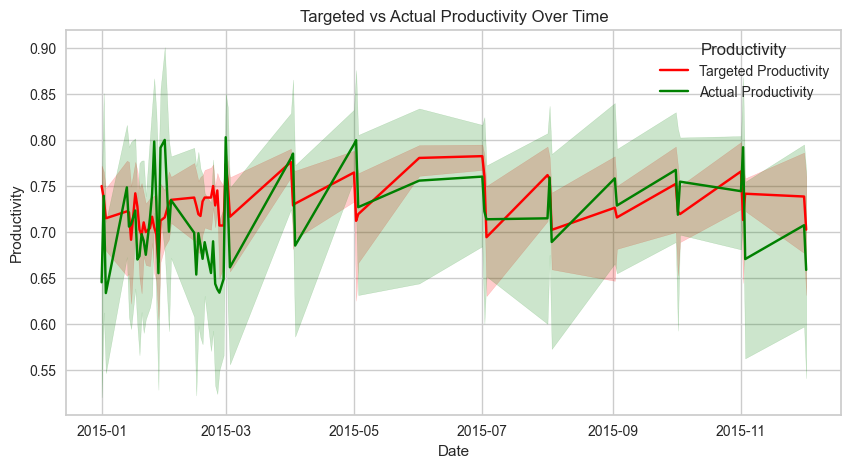

In [171]:
#Line plot of Targeted vs Actual Productivity Over Time
plt.figure(figsize=(10, 5))


sns.lineplot(data=funnel, x='Date', y='Targeted Productivity', label='Targeted Productivity',color='red')
sns.lineplot(data=funnel, x='Date', y='Actual Productivity', label='Actual Productivity',color='green')


plt.title('Targeted vs Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend(title='Productivity',fontsize='small')
plt.grid(True)
plt.show()

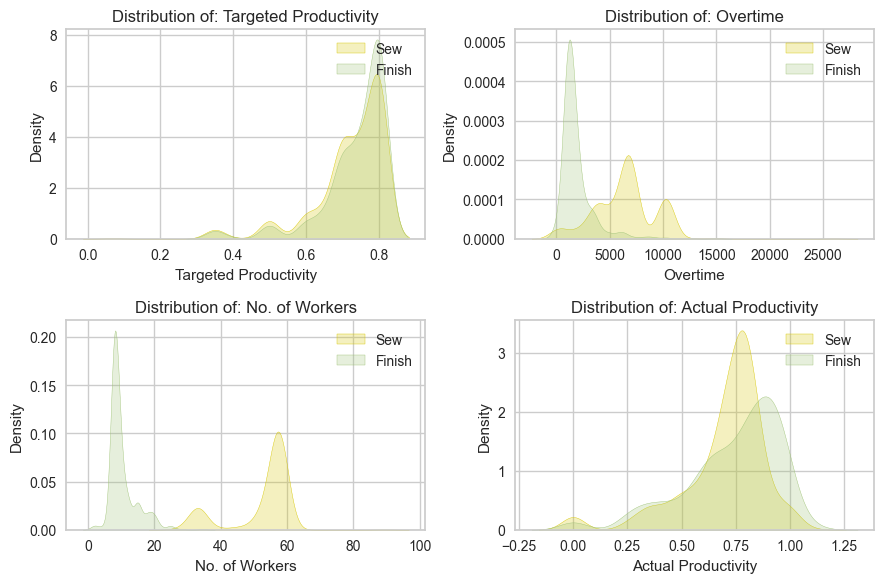

In [172]:
#Distribution of numcols with respect to categorical variable
fig,ax=plt.subplots(2,2,figsize=(9,6))
ax=ax.flatten()                              
for i,col in enumerate(numcols):
    sns.kdeplot(funnel[col][funnel['Department']=='Sewing'],fill=True,ax=ax[i],color='y')
    sns.kdeplot(funnel[col][funnel['Department']=='Finishing'],fill=True,ax=ax[i],color='g')
    ax[i].legend(['Sew','Finish'],fontsize='small')
    ax[i].set_title('Distribution of: {}'.format(col))
plt.tight_layout()
plt.show()

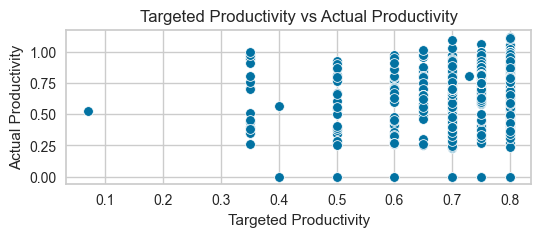

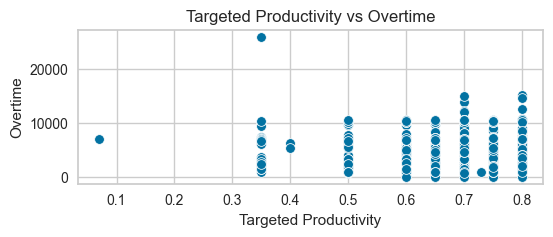

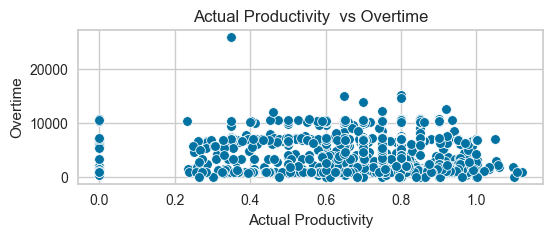

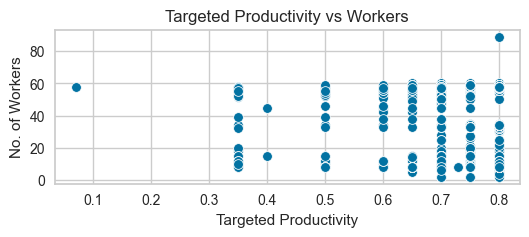

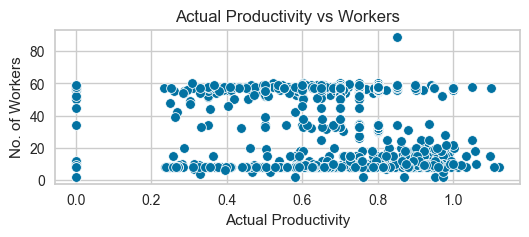

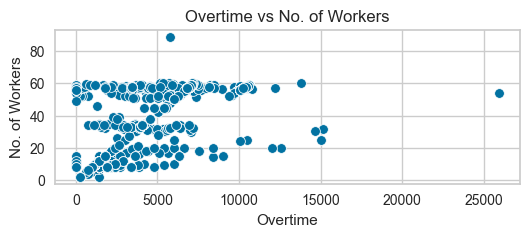

In [173]:
# Scatterplot for Targeted Productivity vs Actual Productivity
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Targeted Productivity', y='Actual Productivity', data=funnel)
plt.title('Targeted Productivity vs Actual Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.grid(True)
plt.show()

# Scatterplot for Targeted Productivity vs Overtime
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Targeted Productivity', y='Overtime', data=funnel)
plt.title('Targeted Productivity vs Overtime')
plt.xlabel('Targeted Productivity')
plt.ylabel('Overtime')
plt.grid(True)
plt.show()

# Scatterplot for  Actual Productivity vs Overtime
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Actual Productivity', y='Overtime', data=funnel)
plt.title('Actual Productivity  vs Overtime')
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.grid(True)
plt.show()

# Scatterplot for Targeted Productivity vs No. of Workers
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Targeted Productivity', y='No. of Workers', data=funnel)
plt.title('Targeted Productivity vs Workers')
plt.xlabel('Targeted Productivity')
plt.ylabel('No. of Workers')
plt.grid(True)
plt.show()

# Scatterplot for  Actual Productivity vs No. of Workers
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Actual Productivity', y='No. of Workers', data=funnel)
plt.title('Actual Productivity vs Workers')
plt.xlabel('Actual Productivity')
plt.ylabel('No. of Workers')
plt.grid(True)
plt.show()



# Scatterplot for Overtime vs No. of Workers
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Overtime', y='No. of Workers', data=funnel)
plt.title('Overtime vs No. of Workers')
plt.xlabel('Overtime')
plt.ylabel('No. of Workers')
plt.grid(True)
plt.show()



## 1.2 Principal Component Analysis (PCA)

Explained Variance Ratio:
 [0.44895076 0.32066553 0.16391889 0.06646482]
Cumulative Explained Variance:
 [0.44895076 0.76961629 0.93353518 1.        ]
Component Loadings:
      Targeted Productivity  Overtime  No. of Workers  Actual Productivity
PC1              -0.262382  0.664116        0.662986            -0.224843
PC2              -0.651297 -0.241587       -0.245113            -0.676290
PC3              -0.711788 -0.005808       -0.038027             0.701340
PC4               0.018054  0.707497       -0.706345            -0.014116


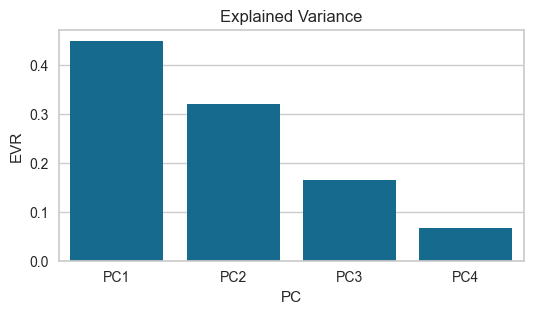

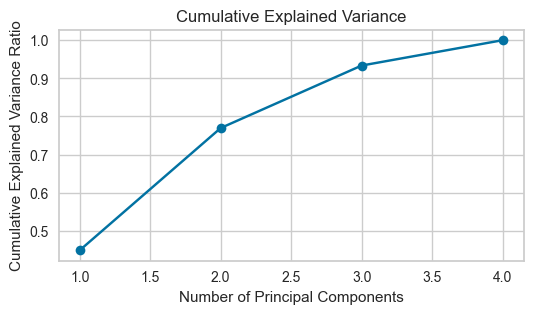

In [174]:
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
X = funnel[features]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance)
print("Cumulative Explained Variance:\n", explained_variance.cumsum())

#component_loadings
component_loadings = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(X_scaled.shape[1])])
print("Component Loadings:\n",component_loadings)

# Visualization
plt.figure(figsize=(6, 3))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.title('Explained Variance')
plt.xlabel('PC')
plt.ylabel('EVR')
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

## 1.3 ARIMA

In [175]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,2015-01-01,Q1,Finishing,0.75,960.0,8.0,0.886500
2,2015-01-01,Q1,Sewing,0.80,3660.0,30.5,0.800570
4,2015-01-01,Q1,Sewing,0.80,1920.0,56.0,0.000000
5,2015-01-01,Q1,Sewing,0.80,6720.0,56.0,0.800125


MAPE: 0.02
MSE: 0.00


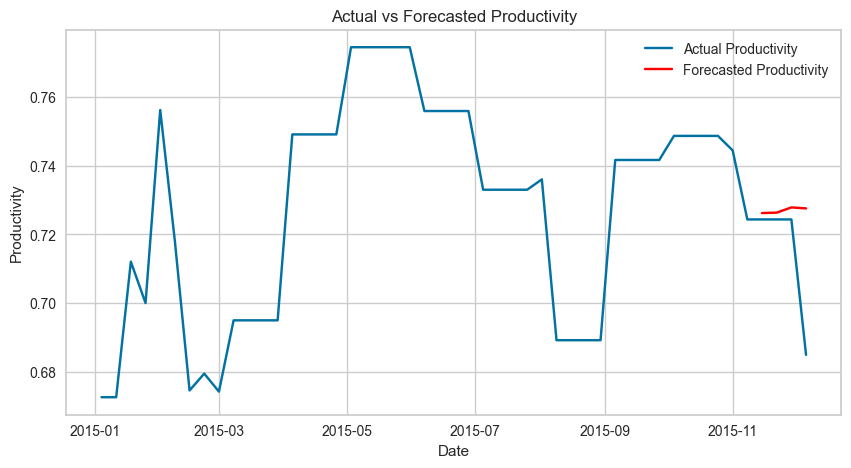

In [176]:
# Convert 'Date' to datetime
funnel['Date'] = pd.to_datetime(funnel['Date'])
funnel.set_index('Date', inplace=True)

# Aggregate Actual Productivity by weeks
funnel_byweek = funnel.resample('W').agg({'Actual Productivity': 'mean'})
 
# Forward fill to handle missing values
funnel_byweek['Actual Productivity'] = funnel_byweek['Actual Productivity'].ffill()

# Define train-test split
train_size = len(funnel_byweek) - 4  # Use all data except last 4 weeks for training
train = funnel_byweek.iloc[:train_size]
test = funnel_byweek.iloc[train_size:]
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model_arima = ARIMA(train['Actual Productivity'], order=(3, 1, 0))  # Adjust (p, d, q) as necessary
model_arima_fit = model_arima.fit()

# Forecast for next 4 weeks
forecast_arima = model_arima_fit.forecast(steps=len(test))
forecast_arima_index = test.index
forecast_arima_series = pd.Series(forecast_arima, index=forecast_arima_index)

forecast_df = pd.DataFrame({
    'Actual': test['Actual Productivity'],
    'Forecast': forecast_arima_series
})

# Calculate MAPE and MSE
mape = mean_absolute_percentage_error(forecast_df['Actual'], forecast_df['Forecast'])
mse = mean_squared_error(forecast_df['Actual'], forecast_df['Forecast'])

print(f'MAPE: {mape:.2f}')
print(f'MSE: {mse:.2f}')

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(funnel_byweek.index, funnel_byweek['Actual Productivity'], label='Actual Productivity')
plt.plot(forecast_arima_series.index, forecast_arima_series, label='Forecasted Productivity', color='red')
plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.show()

## 1.4 Clustering Analysis

Elbow Method to determine the number of clusters to be formed:


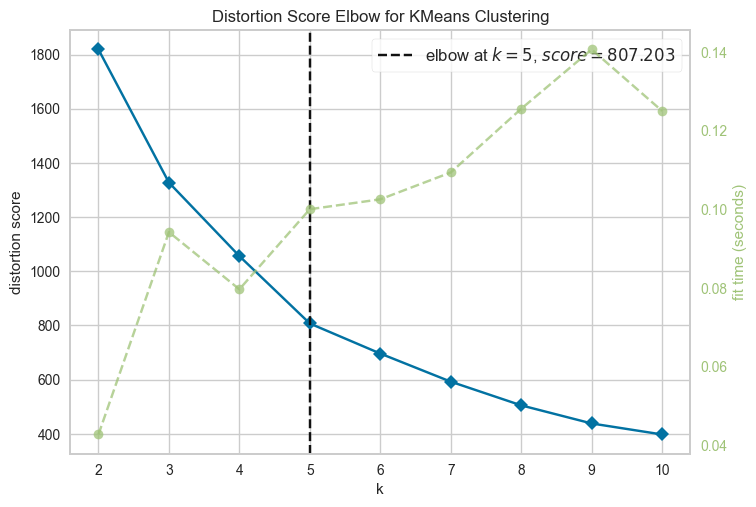

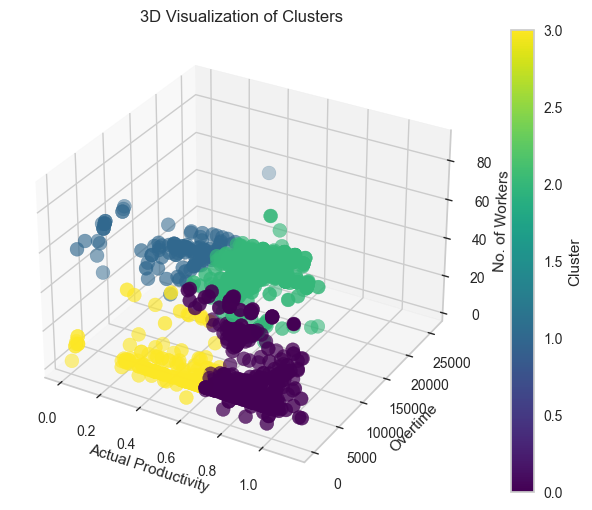

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
data=funnel[['Actual Productivity','Overtime','No. of Workers']]
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method 
print('Elbow Method to determine the number of clusters to be formed:')
from yellowbrick.cluster import KElbowVisualizer
Elbow= KElbowVisualizer(KMeans(), k=10)
Elbow.fit(scaled_data)
Elbow.show()

# Perform K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4,random_state=0) # after finding k , chose cluster=4
clusters = kmeans.fit_predict(scaled_data)
df["Clusters"]=clusters

# Visualize clusters in 3D 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Actual Productivity'], df['Overtime'], df['No. of Workers'], c=df['Clusters'], s=100, cmap='viridis')
ax.set_xlabel('Actual Productivity')
ax.set_ylabel('Overtime')
ax.set_zlabel('No. of Workers')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Visualization of Clusters')
plt.show()

## 1.5 Budget Allocation Strategy

In [178]:
#Average of Actual productivity and sumof workers  
budget = funnel.groupby('Department').agg({
    'Actual Productivity': 'mean',
    'No. of Workers': 'sum'
}).reset_index()

budget['Productivity/Worker'] = budget['Actual Productivity'] / budget['No. of Workers']
budget

,Department,Actual Productivity,No. of Workers,Productivity/Worker
0,Finishing,0.736683,5130.632943,0.000144
1,Sewing,0.698207,34792.000000,0.000020


In [179]:
total_budget = 840000
budget['Normalized Productivity/Worker'] = budget['Productivity/Worker'] / budget['Productivity/Worker'].sum()
budget['Budget'] = budget['Normalized Productivity/Worker'] * total_budget
budget


,Department,Actual Productivity,No. of Workers,Productivity/Worker,Normalized Productivity/Worker,Budget
0,Finishing,0.736683,5130.632943,0.000144,0.877375,736994.705036
1,Sewing,0.698207,34792.000000,0.000020,0.122625,103005.294964


## Section 2.1 - Anomaly detection -EDA

In [180]:
transactions=pd.read_excel('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/AssignmentData.xlsx',sheet_name='creditcard')

In [181]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [182]:
transactions.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [183]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [184]:
objects=['V2','V7','V9','V24']
for obj in objects:
    transactions[obj]=pd.to_numeric(transactions[obj],errors='coerce')

In [185]:
transactions.duplicated().sum()

1081

In [186]:
transactions=transactions.drop_duplicates()

In [187]:
transactions.isnull().sum()

Time      0
V1        0
V2        1
V3        0
V4        0
V5        0
V6        0
V7        2
V8        0
V9        1
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [188]:
transactions=transactions.dropna()

In [189]:
transactions['Class'].value_counts()

Class
0    283248
1       473
Name: count, dtype: int64

In [190]:
transactions['Time'].value_counts()

Time
3767      21
3770      20
3750      19
19912     19
73885     17
          ..
137244     1
50626      1
50622      1
137248     1
169142     1
Name: count, Length: 124591, dtype: int64

In [191]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,...,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000,283721.000000
mean,94811.818914,0.005926,-0.004148,0.001616,-0.002935,0.001830,-0.001134,0.001797,-0.000854,-0.001617,...,-0.000370,-0.000022,0.000198,0.000211,-0.000228,0.000150,0.001761,0.000549,88.473554,0.001667
std,47480.794931,1.948023,1.646701,1.508687,1.414168,1.377018,1.331941,1.227667,1.179057,1.095470,...,0.723913,0.724546,0.623707,0.605629,0.521206,0.482054,0.395745,0.328022,250.401408,0.040797
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54207.000000,-0.915943,-0.600324,-0.889676,-0.850118,-0.689836,-0.769031,-0.552516,-0.208828,-0.644229,...,-0.228304,-0.542703,-0.161700,-0.354456,-0.317488,-0.326764,-0.070642,-0.052818,5.600000,0.000000
50%,84692.000000,0.020382,0.063952,0.179958,-0.022220,-0.053469,-0.275167,0.040857,0.021897,-0.052596,...,-0.029441,0.006675,-0.011157,0.041015,0.016269,-0.052173,0.001479,0.011287,22.000000,0.000000
75%,139299.000000,1.316069,0.800282,1.026962,0.739677,0.612229,0.396827,0.570475,0.325708,0.595973,...,0.186189,0.528240,0.147749,0.439710,0.350668,0.240260,0.091206,0.078275,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [192]:
##UNIVARIATE ANALYSIS

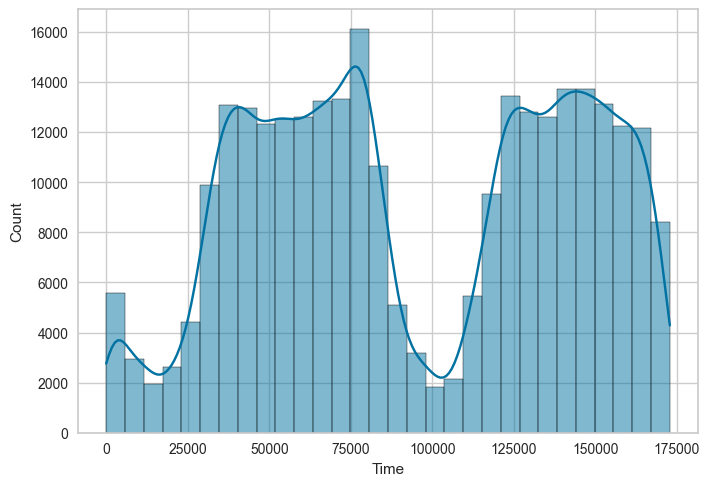

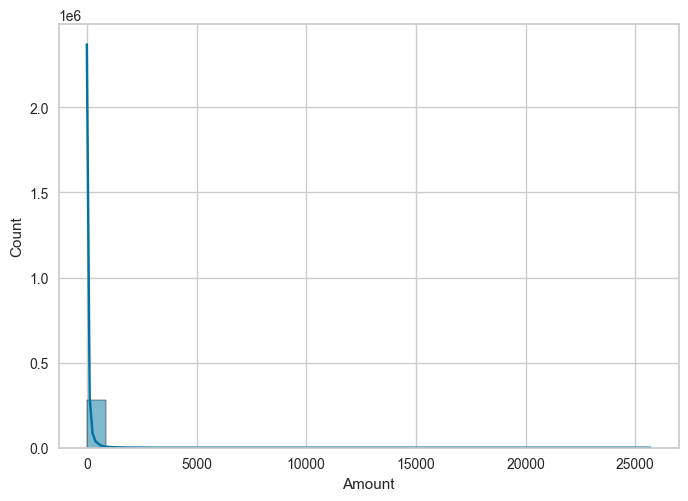

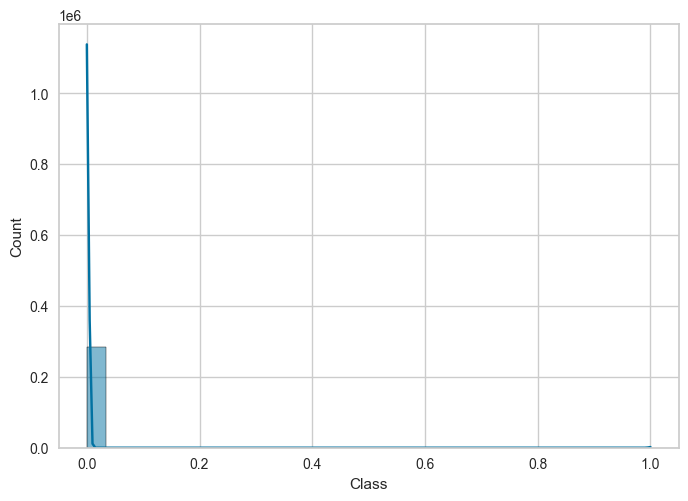

In [193]:
columns=['Time','Amount','Class']
#Distribution of Numerical Columns
for col in columns:
    sns.histplot(x=col,data=transactions,bins=30,kde=True)
    plt.show()

In [194]:
##BIVARIATE ANALYSIS

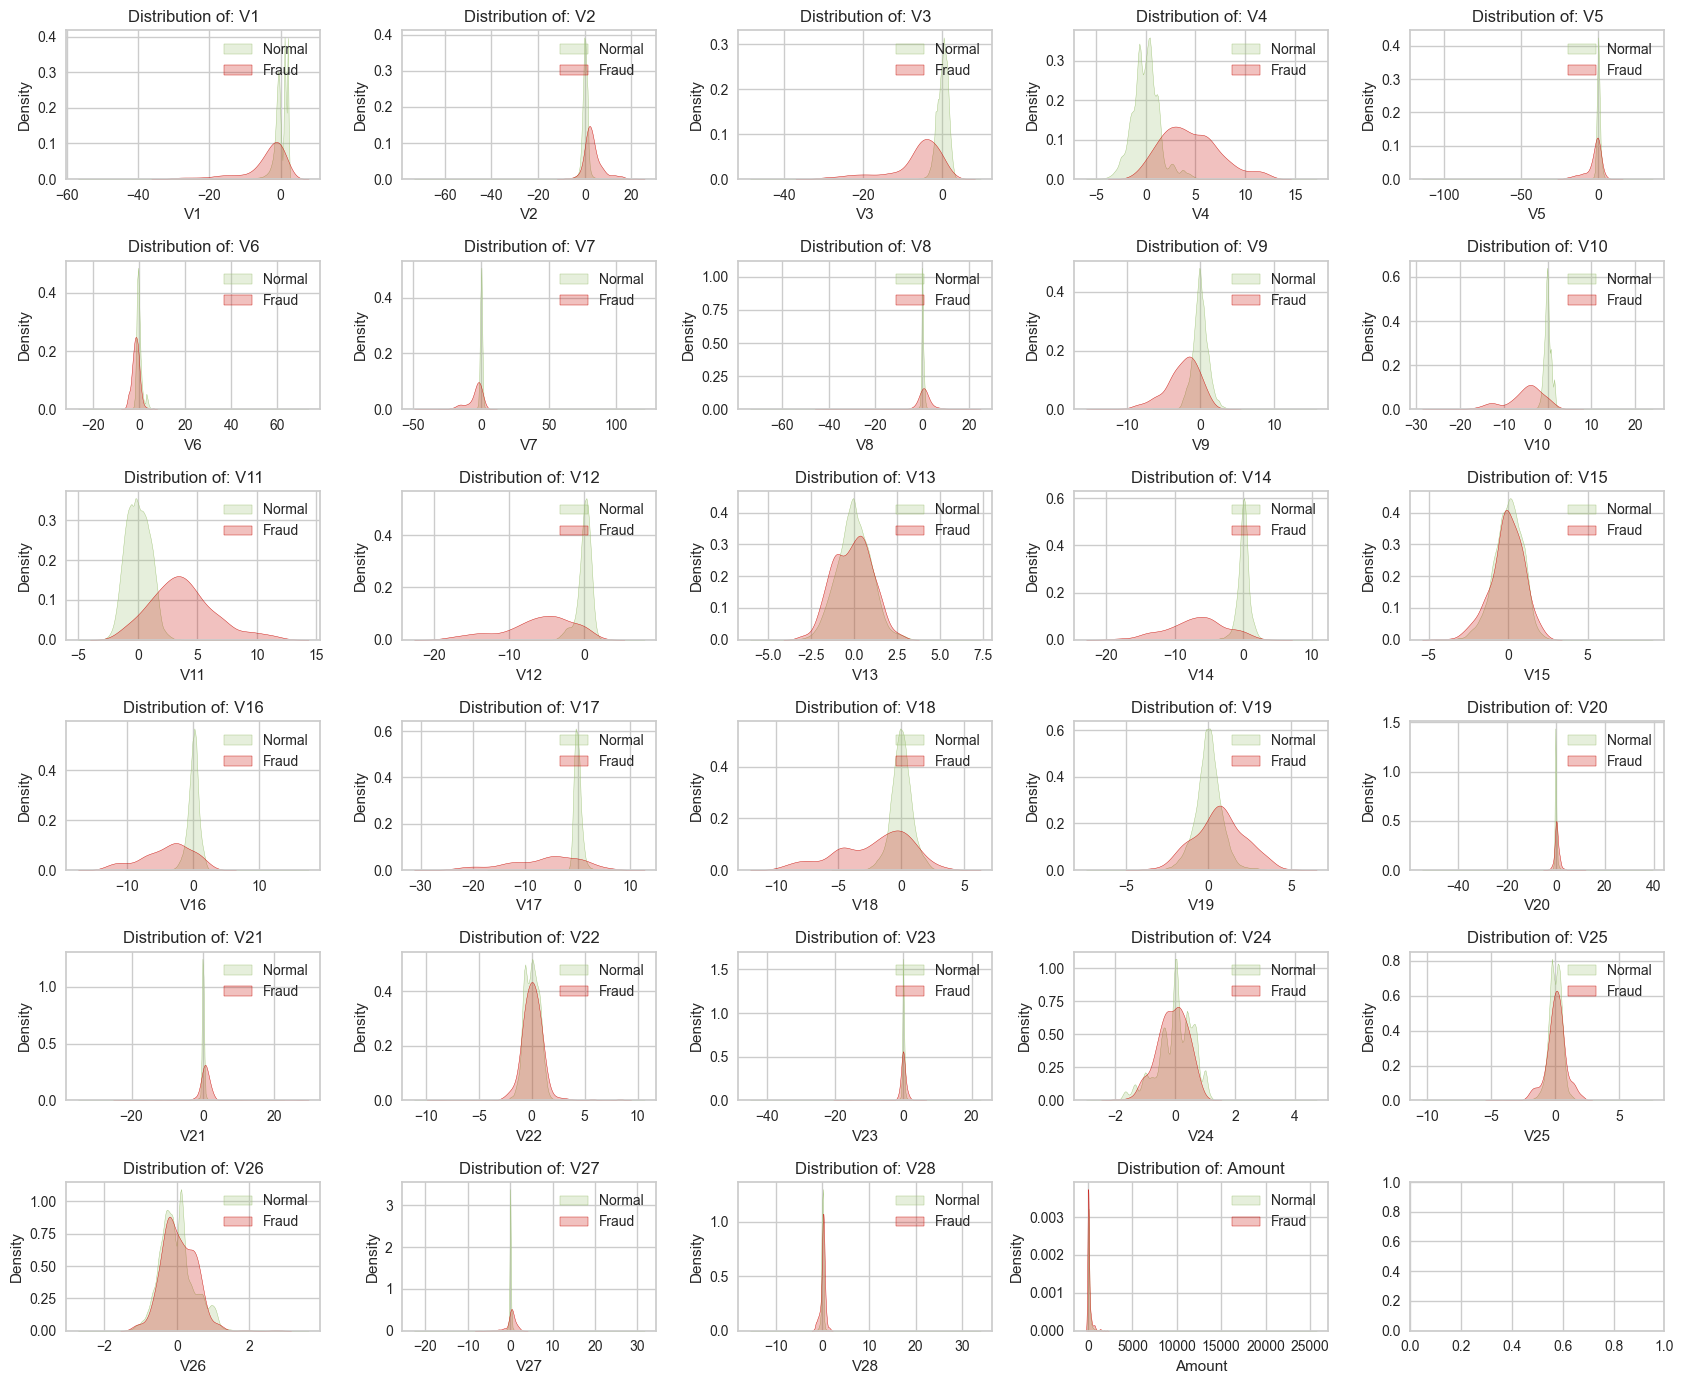

In [195]:
#Distribution of numcols with respect to Class
fig, ax = plt.subplots(6, 5, figsize=(17, 14))
ax=ax.flatten() 

all_column_names = transactions.columns.tolist()
start_index = 1
end_index = 30  
column_names = all_column_names[start_index:end_index]


for i,col in enumerate(column_names):
    sns.kdeplot(transactions[col][transactions['Class']==0],fill=True,ax=ax[i],color='g')
    sns.kdeplot(transactions[col][transactions['Class']==1],fill=True,ax=ax[i],color='r')
    ax[i].legend(['Normal','Fraud'],fontsize='small')
    ax[i].set_title('Distribution of: {}'.format(col))
plt.tight_layout()
plt.show()

In [196]:
##MULTIVARIATE ANALYSIS

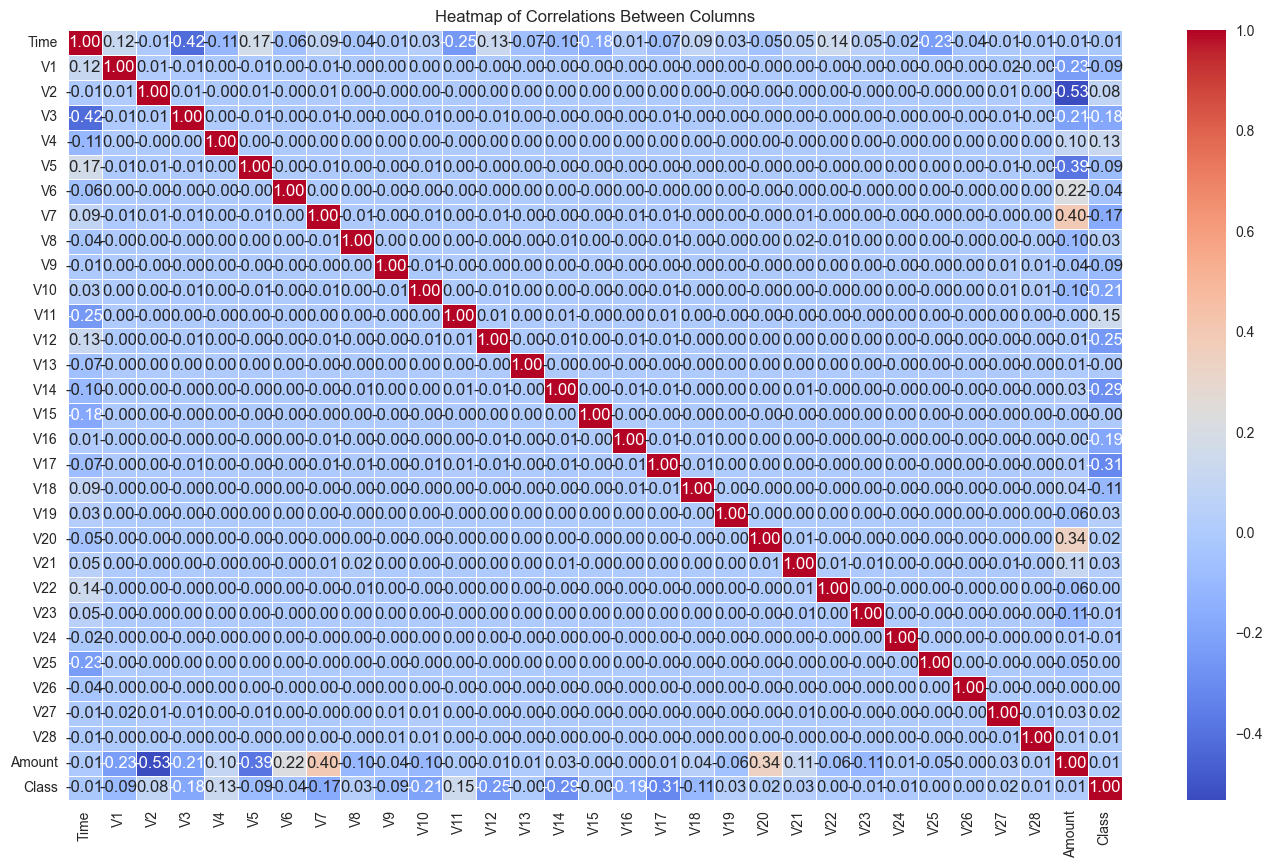

In [197]:
corr_matrix=transactions.corr()

plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations Between Columns')
plt.show()


## 2.2 Feature Engineering

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transactions[['Time', 'Amount']] =scaler.fit_transform(transactions[['Time', 'Amount']])

In [199]:
transactions.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996849,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244194,0
1,-1.996849,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342585,0


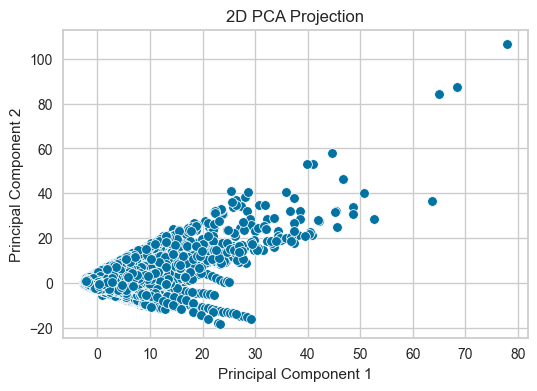

In [200]:
transactions_features = transactions.drop(columns=['Class'])
pca2 = PCA(n_components=2)
transactions_pca = pca2.fit_transform(transactions_features)
#To DataFrame
transactions_pca_df = pd.DataFrame(transactions_pca, columns=['PC1', 'PC2'])

# Plot the PCA 
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', data=transactions_pca_df)
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 2.3 Anomaly Detection Model

In [201]:
# Separate features and target
X_pca = transactions_pca_df
y = transactions['Class']


In [202]:
from sklearn.ensemble import IsolationForest

#Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42) 
iso_forest.fit(X_pca)
y_pred_iso = iso_forest.predict(X_pca)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert from -1 and 1 to 0 and 1


In [203]:
from sklearn.neighbors import LocalOutlierFactor
# LOF model
lof = LocalOutlierFactor(contamination=0.01)
y_pred_lof = lof.fit_predict(X_pca)
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]  # Convert from -1 and 1 to 0 and 1


In [204]:
from sklearn.metrics import classification_report

print("Classification Report for Isolation Forest:")
print(classification_report(y, y_pred_iso))
print("=================================================================")
print("Classification Report for LOF:")
print(classification_report(y, y_pred_lof))


Classification Report for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    283248
           1       0.03      0.18      0.05       473

    accuracy                           0.99    283721
   macro avg       0.51      0.58      0.52    283721
weighted avg       1.00      0.99      0.99    283721

Classification Report for LOF:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    283248
           1       0.03      0.19      0.05       473

    accuracy                           0.99    283721
   macro avg       0.52      0.59      0.52    283721
weighted avg       1.00      0.99      0.99    283721



## 2.4 Visualizing Anomalies

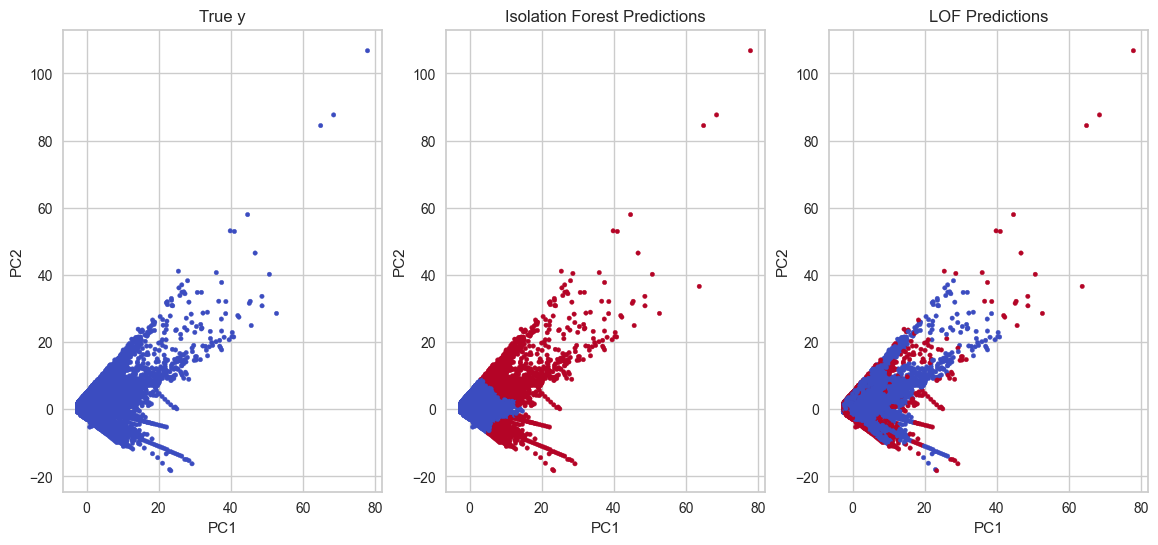

In [205]:
transactions_pca_df['True Labels'] = y
transactions_pca_df['Predicted Labels (ISO)'] = y_pred_iso
transactions_pca_df['Predicted Labels (LOF)'] = y_pred_lof

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(transactions_pca_df['PC1'], transactions_pca_df['PC2'], c=transactions_pca_df['True Labels'], cmap='coolwarm', s=10)
plt.title('True y')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 2)
plt.scatter(transactions_pca_df['PC1'], transactions_pca_df['PC2'], c=transactions_pca_df['Predicted Labels (ISO)'], cmap='coolwarm', s=10)
plt.title('Isolation Forest Predictions')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 3)
plt.scatter(transactions_pca_df['PC1'], transactions_pca_df['PC2'], c=transactions_pca_df['Predicted Labels (LOF)'], cmap='coolwarm', s=10)
plt.title('LOF Predictions')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


## 2.5  Function that accepts a new dataset of credit card transactions

In [206]:
def transactions(new_transactions,scaler, pca,model):

    features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
    new_data = new_transactions[features]

    scaled_data = scaler.transform(new_data)
    pca_data = pca.transform(scaled_data)
    predictions = model.predict(pca_data)

    new_data['Prediction'] = predictions

    fraud = new_data[new_data['Prediction'] == -1] #-1 is anomaly

    return fraud


## Link to the app

In [207]:
## https://d4gmrqzywybwajglfjbh6z.streamlit.app/